## 기본 세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns

## 2024 희귀질환 리스트

In [4]:
df_classf_code= pd.read_csv('../csv/2024년 희귀질환자 의료비 지원사업 대상질환 - 분류코드기준_정리.csv')
df_classf_code

,상병코드,24년 국문 질환명,24년 영문 질환명,신규여부,산정특례 종류,산정특례\n특정기호
0,A31.9,"비정형마이코박테륨증, 가족형, X연관","Atypical mycobacteriosis, familial, x-linked",NaN,극희귀,V900
1,A81.0,아급성 해면모양뇌병증,Subacute spongiform encephalopathy,NaN,희귀,V102
2,A81.0,크로이츠펠트-야콥병,Creutzfeldt-Jakob disease,NaN,희귀,V102
3,"D12.6, M8220/0",가족성선종성폴립증,Familial adenomatous polyposis,NaN,희귀,V281
4,D55.0,G6PD결핍빈혈,G6PD deficiency anaemia,NaN,희귀,V163
...,...,...,...,...,...,...
1243,코드없음,20번 염색체 단완의 결손 증후군,20p deletion syndrome,신규,염색체,V901
1244,코드없음,20번 염색체 장완의 말단부 삼염색체증,Distal trisomy 20q,NaN,염색체,V901
1245,코드없음,21번 염색체 장완의 결손 증후군,21q deletion syndrome,신규,염색체,V901
1246,코드없음,22번 염색체 장완의 결손 증후군,22q deletion syndrome,NaN,염색체,V901


In [5]:
df_filtered = df_classf_code[df_classf_code['상병코드'] == '코드없음']
df_filtered['산정특례 종류'].unique()

array(['극희귀', '염색체'], dtype=object)

In [6]:
df_classf_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상병코드        1248 non-null   object
 1   24년 국문 질환명  1248 non-null   object
 2   24년 영문 질환명  1248 non-null   object
 3   신규여부        83 non-null     object
 4   산정특례 종류     1248 non-null   object
 5   산정특례
특정기호   1248 non-null   object
dtypes: object(6)
memory usage: 58.6+ KB


In [7]:
df_classf_code['산정특례 종류'].value_counts()

산정특례 종류
희귀     797
극희귀    345
염색체    106
Name: count, dtype: int64

In [8]:
df_classf_code['산정특례 종류'].value_counts(normalize=True)

산정특례 종류
희귀     0.638622
극희귀    0.276442
염색체    0.084936
Name: proportion, dtype: float64

In [9]:
df_classf_code_filtered = df_classf_code.loc[df_classf_code['산정특례 종류'] == '희귀']
df_classf_code_filtered[['상병코드', '24년 국문 질환명', '산정특례\n특정기호']].value_counts()

상병코드             24년 국문 질환명     산정특례\n특정기호
Q99.2            취약X증후군         V245          1
A81.0            아급성 해면모양뇌병증    V102          1
                 크로이츠펠트-야콥병     V102          1
D12.6,  M8220/0  가족성선종성폴립증      V281          1
D55.0            G6PD결핍빈혈       V163          1
                                             ..
D61.9            골수형성저하         V023          1
                 범골수황폐          V023          1
                 저형성빈혈 NOS      V023          1
D64.4            선천성 적혈구조혈이상빈혈  V220          1
                 이상조혈성 빈혈(선천성)  V220          1
Name: count, Length: 797, dtype: int64

<Axes: xlabel='24년 국문 질환명', ylabel='count'>

/usr/local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8192 (\N{EN QUAD}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8192 (\N{EN QUAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


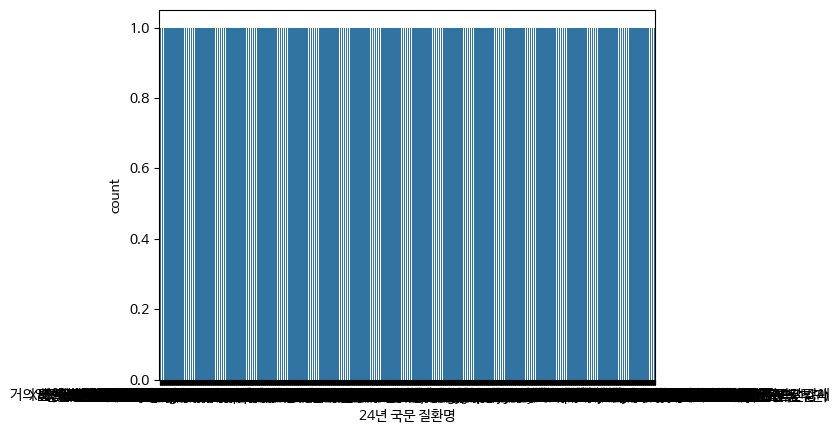

In [10]:
# 범주형 데이터 개수 확인
sns.countplot(x='24년 국문 질환명', data=df_classf_code)                                                                                                                                                  

## 2021 희귀질환 리스트

In [11]:
df_rare_2021 = pd.read_csv('../csv/2021_질병분류코드별_진료내역_항목별_요양급여비용_현황.csv')

In [12]:
df_rare_2021

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
0,계,소계,NaN,317789679,63604106,48547544,6489961,69347268,1024116,13417865,129127,22622419,46850108,4686879,41070288
1,희귀질환,소계,NaN,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
2,희귀질환,A81.0,크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
3,희귀질환,D12.6,M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
4,희귀질환,D55.0,G6PD결핍빈혈,177,49,-,-,-,-,-,-,-,128,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,기타염색체이상질환,Q93.5,16번 염색체 단완의 결손,326,271,55,-,-,-,-,-,-,-,-,-
722,기타염색체이상질환,Q93.2,18번 고리모양 염색체,492,211,93,-,-,-,-,30,-,157,-,-
723,기타염색체이상질환,Q92.7,18번 염색체 단완의 사염색체증,7104,903,159,7,-,-,1341,-,28,4466,181,18
724,기타염색체이상질환,Q99.8,X 염색체장완의 28부분의 중복 증후군,5423,547,17,-,-,-,4462,-,-,398,-,-


### 희귀질환(내분비,영향 / 정신및행동)

In [34]:
# 질환분류 - '희귀질환'만 추출(509개)
df_rare_2021_filtered = df_rare_2021.loc[df_rare_2021['질환분류'] == '희귀질환']
df_rare_2021_filtered.info()
# df_rare_2021_filtered[['상병코드', '24년 국문 질환명', '산정특례\n특정기호']].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 1 to 509
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          509 non-null    object
 1   질환코드          509 non-null    object
 2   질환명           508 non-null    object
 3   계             509 non-null    int64 
 4   진찰료           509 non-null    int64 
 5   입원료           509 non-null    object
 6   투약료           509 non-null    object
 7   주사료           509 non-null    object
 8   마취료           509 non-null    object
 9   이학요법료         509 non-null    object
 10  정신요법료         509 non-null    object
 11  처치 및 수술료      509 non-null    object
 12  검사료           509 non-null    object
 13  영상 및 방사선 치료료  509 non-null    object
 14  기타            509 non-null    object
dtypes: int64(2), object(13)
memory usage: 63.6+ KB


In [40]:
# '질환코드' 열에서 'E' 또는 'F'로 시작하는 행 필터링
df_rare_2021_filtered_letter = df_rare_2021_filtered[df_rare_2021_filtered['질환코드'].str.startswith(('E', 'F'), na=False)]
df_rare_2021_filtered_letter
# E = 내분비,영양 / F =  정신및행동

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
84,희귀질환,E22.0,말단비대증 및 뇌하수체거인증,527301,30928,19952,2206,339455,5923,32,-,32777,53372,8626,34029
85,희귀질환,E22.0,성장호르몬의 과잉생산,23707,786,123,144,19540,-,-,-,521,1613,38,943
86,희귀질환,E23.0,쉬한증후군,171436,37359,19547,13998,20927,197,26,-,5864,24917,1069,47532
87,희귀질환,E23.0,콜만증후군,11849,4916,613,-,2435,-,-,-,-,3002,33,850
88,희귀질환,E24.0,뇌하수체 부신피질자극호르몬의 과다생산,148746,21370,19932,1509,4023,5277,12,103,30777,35860,8618,21266
89,희귀질환,E24.0,뇌하수체-의존 부신피질기능항진증,2042,1731,103,0,-,-,-,-,-,200,9,-
90,희귀질환,E24.0,뇌하수체-의존 쿠싱병,296315,43640,67866,2147,26899,8582,151,29,54638,54439,7531,30393
91,희귀질환,E24.3,이소성 부신피질자극호르몬증후군,34711,6191,6956,874,2518,1,23,50,1291,9879,1323,5605
92,희귀질환,E25.0,21-수산화효소결핍,4897,1047,215,-,1684,-,81,-,-,1842,29,-
93,희귀질환,E25.0,선천성 부신증식증,19730,8116,1387,310,1635,-,-,-,-,6929,162,1192


In [55]:
# '질환코드'와 '질환명' 열을 기준으로 내림차순 정렬
df_rare_2021_filtered_letter_sorted = df_rare_2021_filtered_letter.sort_values(by=['질환코드', '질환명'], ascending=False)
df_rare_2021_filtered_letter_sorted

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
185,희귀질환,F84.2,레트증후군,62466,12143,752,359,8,-,34679,317,1344,11668,310,887
184,희귀질환,F80.3,뇌전증에 동반된 후천성 실어증(失語症)[란다우-클레프너],35591,1170,284,1,23,-,-,-,1,3070,38,31005
183,희귀질환,F01.1,카다실,913105,253119,156289,15922,14823,1283,124979,380,14372,46068,1702,284166
182,희귀질환,E85.4,기관한정아밀로이드증,1460778,360623,260377,74387,103987,3041,68086,226,136608,267529,25055,160859
181,희귀질환,E85.4,국소적 아밀로이드증,465450,149430,66763,3577,85480,1327,87,209,54969,82893,6420,14292
180,희귀질환,E85.2,상세불명의 유전가족성 아밀로이드증,102184,92928,2504,36,147,19,-,-,457,4685,845,563
179,희귀질환,E85.1,아밀로이드다발신경병증(포르투갈),2285,567,117,-,-,-,-,-,-,623,20,959
178,희귀질환,E85.1,신경병성 유전가족성 아밀로이드증,201369,103725,10783,183,3576,1,30056,-,873,3768,122,48282
177,희귀질환,E85.0,가족성 지중해열,754,410,146,-,-,-,-,-,-,198,-,-
176,희귀질환,E84.1,장증상을 동반한 낭성 섬유증,343,61,-,-,282,-,-,-,-,-,-,-


In [42]:
df_rare_2021_filtered_letter.info()
# 질환코드 기준
# 내분비,영양 99개 / 정신및행동 3개

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 84 to 185
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          102 non-null    object
 1   질환코드          102 non-null    object
 2   질환명           102 non-null    object
 3   계             102 non-null    int64 
 4   진찰료           102 non-null    int64 
 5   입원료           102 non-null    object
 6   투약료           102 non-null    object
 7   주사료           102 non-null    object
 8   마취료           102 non-null    object
 9   이학요법료         102 non-null    object
 10  정신요법료         102 non-null    object
 11  처치 및 수술료      102 non-null    object
 12  검사료           102 non-null    object
 13  영상 및 방사선 치료료  102 non-null    object
 14  기타            102 non-null    object
dtypes: int64(2), object(13)
memory usage: 12.8+ KB


### 극희귀질환(내분비,영향 / 정신및행동)

In [35]:
# 질환분류 - '극희귀질환'만 추출(182개)
df_rare_2021_filtered_Extreme = df_rare_2021.loc[df_rare_2021['질환분류'] == '극희귀질환']
df_rare_2021_filtered_Extreme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 510 to 691
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          182 non-null    object
 1   질환코드          157 non-null    object
 2   질환명           181 non-null    object
 3   계             182 non-null    int64 
 4   진찰료           182 non-null    int64 
 5   입원료           182 non-null    object
 6   투약료           182 non-null    object
 7   주사료           182 non-null    object
 8   마취료           182 non-null    object
 9   이학요법료         182 non-null    object
 10  정신요법료         182 non-null    object
 11  처치 및 수술료      182 non-null    object
 12  검사료           182 non-null    object
 13  영상 및 방사선 치료료  182 non-null    object
 14  기타            182 non-null    object
dtypes: int64(2), object(13)
memory usage: 22.8+ KB


In [44]:
# '질환코드' 열에서 'E' 또는 'F'로 시작하는 행 필터링
df_rare_2021_filtered_Extreme_letter = df_rare_2021_filtered_Extreme[df_rare_2021_filtered_Extreme['질환코드'].str.startswith(('E', 'F'), na=False)]
df_rare_2021_filtered_Extreme_letter
# E = 내분비,영양 / F =  정신및행동

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
515,극희귀질환,E16.10,선천성 고인슐린혈증,6946,4705,162,0,-,-,-,-,9,1835,75,161
516,극희귀질환,E20.1,거짓 부갑상선기능저하증,8635,4246,732,10,18,-,-,-,42,2893,133,561
517,극희귀질환,E72.8,숙신알데히드 탈수소효소 결핍(증),8379,813,1880,0,-,-,4827,-,-,205,15,639
518,극희귀질환,E75.2,펠리제우스-메르츠바하병,11687,1756,130,4,-,-,9479,15,-,280,23,0
519,극희귀질환,E83.1+,특발성 폐 헤모시데린증(J99.8*),746,372,114,-,-,-,-,-,-,161,86,13
520,극희귀질환,E88.1,선천성 전신지방디스트로피,262,145,39,0,-,-,1,-,-,77,-,-
614,극희귀질환,E74.0,다논 병,3598,1783,143,17,7,-,1,-,4,1219,14,409
616,극희귀질환,E78.0,동형접합 가족성 고콜레스테롤혈증,5725,1598,227,1,3377,-,-,133,-,389,-,-
622,극희귀질환,E66.2,E23.3 로하드 증후군,4601,1524,303,248,1305,18,61,-,10,1096,34,1
638,극희귀질환,E20.8,H90.3-H90.5 사례별 동반 신장질환 부갑상선기능저하증-감각신경성 난청- 신장...,2311,921,252,0,16,-,3,-,15,1093,9,0


In [46]:
df_rare_2021_filtered_Extreme_letter.info()
# 질환코드 기준
# 내분비,영양 18개 / 정신및행동 0개

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 515 to 687
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          18 non-null     object
 1   질환코드          18 non-null     object
 2   질환명           18 non-null     object
 3   계             18 non-null     int64 
 4   진찰료           18 non-null     int64 
 5   입원료           18 non-null     object
 6   투약료           18 non-null     object
 7   주사료           18 non-null     object
 8   마취료           18 non-null     object
 9   이학요법료         18 non-null     object
 10  정신요법료         18 non-null     object
 11  처치 및 수술료      18 non-null     object
 12  검사료           18 non-null     object
 13  영상 및 방사선 치료료  18 non-null     object
 14  기타            18 non-null     object
dtypes: int64(2), object(13)
memory usage: 2.2+ KB


### 내분비,영양(E코드) 및 정신및행동(F코드) - 질환 분류에 따른 개수확인
1. 희귀질환
   1) 내분비,영양(E코드) : 99개
   2) 정신및행동(F코드) : 3개
2. 극희귀질환
   1) 내분비,영양(E코드) : 18개
   2) 정신및행동(F코드) : 0개

## 확인

In [48]:
# 희귀질환, 극희귀질환 전체 개수(691)
df_rare_2021 = df_rare_2021[df_rare_2021['질환분류'].isin(['희귀질환', '극희귀질환'])]
df_rare_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 1 to 691
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          691 non-null    object
 1   질환코드          666 non-null    object
 2   질환명           689 non-null    object
 3   계             691 non-null    int64 
 4   진찰료           691 non-null    int64 
 5   입원료           691 non-null    object
 6   투약료           691 non-null    object
 7   주사료           691 non-null    object
 8   마취료           691 non-null    object
 9   이학요법료         691 non-null    object
 10  정신요법료         691 non-null    object
 11  처치 및 수술료      691 non-null    object
 12  검사료           691 non-null    object
 13  영상 및 방사선 치료료  691 non-null    object
 14  기타            691 non-null    object
dtypes: int64(2), object(13)
memory usage: 86.4+ KB


In [21]:
# 최대 행수와 최대 열수 보여주기
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
df_rare_2021

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
1,희귀질환,소계,NaN,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
2,희귀질환,A81.0,크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
3,희귀질환,D12.6,M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
4,희귀질환,D55.0,G6PD결핍빈혈,177,49,-,-,-,-,-,-,-,128,-,-
5,희귀질환,D55.0,포도당-6-인산탈수소효소결핍에 의한 빈혈,25,25,-,-,-,-,-,-,-,-,-,-
6,희귀질환,D55.2,피루브산염카이네이스결핍빈혈,5377,4131,87,-,-,-,-,-,-,116,-,1043
7,희귀질환,D55.2,해당효소의 장애에 의한 빈혈,2463,504,44,-,1187,-,-,-,-,721,-,7
8,희귀질환,D56.0,알파지중해빈혈,1300,388,18,1,71,-,-,-,-,823,-,-
9,희귀질환,D56.1,베타지중해빈혈,50499,21374,9487,715,3692,-,-,27,1638,11624,289,1652
10,희귀질환,D56.2,델타-베타지중해빈혈,110,66,-,-,-,-,-,-,-,44,-,-


In [17]:
if df_rare_2021 is not None:
    print(df_rare_2021.head(20))
else:
    print("DataFrame이 존재하지 않습니다.")

    질환분류   질환코드                     질환명          계       진찰료       입원료  \
1   희귀질환     소계                     NaN  308572698  62306518  46864613   
2   희귀질환  A81.0              크로이츠펠트-야콥병    1624857     73975    273196   
3   희귀질환  D12.6       M8220/0 가족성선종성폴립증     322142     25918     51745   
4   희귀질환  D55.0                G6PD결핍빈혈        177        49         -   
5   희귀질환  D55.0  포도당-6-인산탈수소효소결핍에 의한 빈혈         25        25         -   
6   희귀질환  D55.2          피루브산염카이네이스결핍빈혈       5377      4131        87   
7   희귀질환  D55.2         해당효소의 장애에 의한 빈혈       2463       504        44   
8   희귀질환  D56.0                 알파지중해빈혈       1300       388        18   
9   희귀질환  D56.1                 베타지중해빈혈      50499     21374      9487   
10  희귀질환  D56.2              델타-베타지중해빈혈        110        66         -   
11  희귀질환  D56.3                지중해빈혈 소질       7589      5096       164   
12  희귀질환  D56.4         태아헤모글로빈의 유전적 존속       1196       302        29   
13  희귀질환  D59.3            비정형 용혈-요독증후

In [18]:
def codes(x):
    condition = (df_rare_2021["질환코드"] == x[0]) &\
           (float(x[1:]) >= df_rare_2021["코드시작"].astype(float)) &\
           (float(x[1:]) <= df_rare_2021["코드끝"].astype(float))
    result = df_rare_2021.loc[condition, '항목분류']
    if len(result) > 0:
        return result.iloc[0]
    else:
        return None  # 여기서 None 대신 원하는 기본값을 사용하십시오.

